# <font color=#4A148C> World Happiness Report</font>
## <font color=#6A1B9A> Exploratory Data Analysis</font>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np

In [2]:
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets

# import plotly.io as pio

# pio.renderers
#from IPython.display import display

### Data Processing

- Explore all the data set
- Try to make them all look a like
- Drop Whisker-high, Whisher-low columns
- Renaming columns
- Merge column Regional indicator to 2022,2019, 2018 dataset from 2021

First we will process 2021 and 2020 dataset

#### Processing 2021 Dataset first

In [3]:
df_2021 = pd.read_csv('Data/2021.csv')
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
# Processing 2021 data
df_2021.insert(0, 'Rank', list(range(1,len(df_2021)+1)))
df_2021 = df_2021.drop(['upperwhisker', 'lowerwhisker', 'Standard error of ladder score',\
                        'Logged GDP per capita'], axis=1)
df_2021 = df_2021.drop(['Perceptions of corruption', 'Ladder score in Dystopia', 'Generosity', \
                        'Freedom to make life choices', 'Healthy life expectancy', 'Social support'], axis=1)


df_column_list = ['Rank', 'Country','Region', 'Score', 'GDP per Capita',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom for life choices', 'Generosity',
       'Perceptions of Corruption', 'Dystopia + Residual']

df_2021.columns = df_column_list

df_2021 = df_2021.round(decimals = 2)
df_2021.head()

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption,Dystopia + Residual
0,1,Finland,Western Europe,7.84,1.45,1.11,0.74,0.69,0.12,0.48,3.25
1,2,Denmark,Western Europe,7.62,1.50,1.11,0.76,0.69,0.21,0.48,2.87
2,3,Switzerland,Western Europe,7.57,1.57,1.08,0.82,0.65,0.20,0.41,2.84
3,4,Iceland,Western Europe,7.55,1.48,1.17,0.77,0.70,0.29,0.17,2.97
4,5,Netherlands,Western Europe,7.46,1.50,1.08,0.75,0.65,0.30,0.38,2.80


In [5]:
df_2020 = pd.read_csv('Data/2020.csv')
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [6]:

df_2020.insert(0, 'Rank', list(range(1,len(df_2020)+1)))
df_2020 = df_2020.drop(['upperwhisker', 'lowerwhisker', 'Standard error of ladder score',\
                        'Logged GDP per capita'], axis=1)
df_2020 = df_2020.drop(['Perceptions of corruption', 'Ladder score in Dystopia', 'Generosity',\
                        'Freedom to make life choices', 'Healthy life expectancy', 'Social support'], axis=1)

df_2020.columns = df_column_list
df_2020 = df_2020.round(decimals = 2)
df_2020.head()

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption,Dystopia + Residual
0,1,Finland,Western Europe,7.81,1.29,1.50,0.96,0.66,0.16,0.48,2.76
1,2,Denmark,Western Europe,7.65,1.33,1.50,0.98,0.67,0.24,0.50,2.43
2,3,Switzerland,Western Europe,7.56,1.39,1.47,1.04,0.63,0.27,0.41,2.35
3,4,Iceland,Western Europe,7.50,1.33,1.55,1.00,0.66,0.36,0.14,2.46
4,5,Norway,Western Europe,7.49,1.42,1.50,1.01,0.67,0.29,0.43,2.17


### Processing 2022 data
* First few countries have * with their names, so we will remove them 
* Then, a new column Region in 2022 data set was added from 2021 using pandas merge function
* 'Whisker-high', 'Whisker-low' columns was droped
* Then 'Dystopia + residual' and 'Region' column was re-arranged in the dataframe to look excatly like 2021, 2020
* Finally columns were renamed to match to 2021, 2020 dataset.

In [7]:
# First region are created from 2021 dataset
region=df_2021[['Country', 'Region']]
region.head()

,Country,Region
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe


In [8]:
df_2022 = pd.read_csv('Data/2022.csv')
df_2022.head(6)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388


In [9]:
df_2022['Country'] = df_2022['Country'].str.strip('*')
df_2022 = df_2022.merge(region, how='left', on='Country')
df_2022 = df_2022.drop(['Whisker-high', 'Whisker-low'], axis=1)

In [10]:
regions = df_2022.pop('Region')
df_2022.insert(2, 'Region', regions)
dystopia = df_2022.pop('Dystopia (1.83) + residual')
df_2022['Dystopia + Residual']=dystopia
df_2022.columns=df_column_list
df_2022 = df_2022.round(decimals = 2)
df_2022.head(6)

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption,Dystopia + Residual
0,1,Finland,Western Europe,7.82,1.89,1.26,0.78,0.74,0.11,0.53,2.52
1,2,Denmark,Western Europe,7.64,1.95,1.24,0.78,0.72,0.19,0.53,2.23
2,3,Iceland,Western Europe,7.56,1.94,1.32,0.80,0.72,0.27,0.19,2.32
3,4,Switzerland,Western Europe,7.51,2.03,1.23,0.82,0.68,0.15,0.46,2.15
4,5,Netherlands,Western Europe,7.42,1.94,1.21,0.79,0.65,0.27,0.42,2.14
5,6,Luxembourg,Western Europe,7.40,2.21,1.16,0.79,0.70,0.12,0.39,2.04


#### Processing 2019 data
 * First a new column Region in 2019 data set was added from 2021 using pandas merge function
 * rename columns

In [11]:
# Processing 2019 data
df_2019 = pd.read_csv('Data/2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
df_column_list_2 =['Rank', 'Country', 'Score', 'GDP per Capita','Social Support', 'Healthy Life Expectancy',
       'Freedom for life choices', 'Generosity',
       'Perceptions of Corruption']

df_2019.columns = df_column_list_2
df_2019 = df_2019.round(decimals = 2)

In [13]:
df_2019 = df_2019.merge(region, how='left', on='Country')
df_2019 = df_2019[df_column_list[:-1]]
df_2019.head()

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption
0,1,Finland,Western Europe,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,2,Denmark,Western Europe,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,3,Norway,Western Europe,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,4,Iceland,Western Europe,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,5,Netherlands,Western Europe,7.49,1.40,1.52,1.00,0.56,0.32,0.30


#### Processing 2018 data

In [14]:
# Processing 2019 data
df_2018 = pd.read_csv('Data/2018.csv')
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [15]:
df_2018.columns = df_column_list_2
df_2018 = df_2018.round(decimals = 2)
df_2018 = df_2018.merge(region, how='left', on='Country')
regions_2018 = df_2018.pop('Region')
df_2018.insert(2, 'Region', regions_2018)
df_2018.head()

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption
0,1,Finland,Western Europe,7.63,1.30,1.59,0.87,0.68,0.20,0.39
1,2,Norway,Western Europe,7.59,1.46,1.58,0.86,0.69,0.29,0.34
2,3,Denmark,Western Europe,7.56,1.35,1.59,0.87,0.68,0.28,0.41
3,4,Iceland,Western Europe,7.50,1.34,1.64,0.91,0.68,0.35,0.14
4,5,Switzerland,Western Europe,7.49,1.42,1.55,0.93,0.66,0.26,0.36


### Checking for null values

Now we will check if we have any missing values or not in any dataset.

In [16]:
df_2022.isnull().sum()

Rank                         0
Country                      0
Region                       3
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    0
Dystopia + Residual          0
dtype: int64

In [17]:
df_2022[df_2022.isna().any(axis=1)]

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption,Dystopia + Residual
17,18,Czechia,NaN,6.92,1.82,1.26,0.72,0.66,0.16,0.05,2.26
98,99,Congo,NaN,5.08,0.95,0.40,0.36,0.43,0.13,0.15,2.66
124,125,"Eswatini, Kingdom of",NaN,4.40,1.27,0.79,0.20,0.26,0.04,0.15,1.69


#### Region importing from github

* https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [18]:
df_region = pd.read_csv('Data/regions.csv')
df_region.head(2)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,South Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248.0,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN


In [19]:
df_region=df_region[['name', 'sub-region']]
df_region.columns = ['Country', 'Region']
df_region.head()

,Country,Region
0,Afghanistan,South Asia
1,Åland Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia


In [20]:
def region_add(data, region_data):
    for c in data[data.isna().any(axis=1)]['Country']:    
        for elem in region_data['Country']:
            if elem == c:
                data['Region']=np.where((data['Country']==c),\
                                        region_data[region_data['Country']==c]['Region'], data['Region'])
            
    return data

In [21]:
df_2022 = region_add(df_2022, df_region)
df_2022.isnull().sum()

Rank                         0
Country                      0
Region                       0
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    0
Dystopia + Residual          0
dtype: int64

#### Now by using the regions data from github file we added regions to
- Czechia
- Congo
- Eswatini

in 2022 dataset.

We will follow the same process for the all the dataset with NaN regions.


In [22]:
df_2021.isnull().sum()

Rank                         0
Country                      0
Region                       0
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    0
Dystopia + Residual          0
dtype: int64

In [23]:
df_2020.isnull().sum()

Rank                         0
Country                      0
Region                       0
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    0
Dystopia + Residual          0
dtype: int64

In [24]:
df_2019.isnull().sum()

Rank                          0
Country                       0
Region                       11
Score                         0
GDP per Capita                0
Social Support                0
Healthy Life Expectancy       0
Freedom for life choices      0
Generosity                    0
Perceptions of Corruption     0
dtype: int64

#### 2019 have 11 countries that are missing regions. So we will add them from the github file

In [25]:
df_2019 = region_add(df_2019, df_region)
df_2019.isnull().sum()

Rank                         0
Country                      0
Region                       0
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    0
dtype: int64

In [26]:
df_2018.isnull().sum()

Rank                          0
Country                       0
Region                       15
Score                         0
GDP per Capita                0
Social Support                0
Healthy Life Expectancy       0
Freedom for life choices      0
Generosity                    0
Perceptions of Corruption     1
dtype: int64

In [27]:
df_2018 = region_add(df_2018, df_region)
df_2018.isnull().sum()

Rank                         0
Country                      0
Region                       0
Score                        0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom for life choices     0
Generosity                   0
Perceptions of Corruption    1
dtype: int64

In [28]:
df_2018[df_2018.isna().any(axis=1)]

,Rank,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom for life choices,Generosity,Perceptions of Corruption
19,20,United Arab Emirates,Western Asia,6.77,2.1,0.78,0.67,0.28,0.19,NaN


We may replace this NaN with mean or median value of the the column, but for our analysis here this null value is not going to impact us. So we will leave this as NaN for now. 

## Exploratory Data Analysis with Plotly

In [31]:
def create_barplot_top(data, number_of_countries, year):

    fig = go.Figure()
    color_list=['rgb(237,247,178)', 'rgb(213,238,179)', 'rgb(152,214,185)', \
                'rgb(78,187,194)', 'rgb(30,145,192)', 'rgb(34,92,166)', \
                'rgb(33,49,140)']

    col_list = data.columns[4:]
    for col, color in zip(col_list,color_list):
        fig.add_trace(go.Barpolar(
            theta = data['Country'][:number_of_countries],
            r = data[col][:number_of_countries],
            name = col,
            marker = dict(color=color), opacity=0.7
            )
        )

    fig.update_layout(
        title = dict(
            text=f'Top {number_of_countries} Happy Countries of {year}', 
            yanchor = 'top', xanchor='center',
            x = 0.5, y=0.95
        ),
        barmode='stack',
        template='simple_white'
    )


    fig.add_annotation(dict(font=dict(color='grey',size=18),
        text = 'Happiest Countries',                   
        x = 0.5, y=0.52, showarrow=False 
    ))

    fig.add_annotation(dict(font=dict(color='grey',size=18),
        text = 'of the World',                   
        x = 0.5, y=0.48, showarrow=False 
    ))

    fig.update_layout(width=1000, height=800)
    fig.update_layout(legend=dict(
        orientation = 'h',
        yanchor = 'top',
        y=-0.1,
        xanchor='center',
        x=0.5
    ))

    fig.update_layout(polar=dict(radialaxis=dict(range=[-4,8], showticklabels=False, 
                                                ticks='', linewidth=0, showgrid=False),
                                 angularaxis = dict(
                                    direction = "clockwise",
                                        period = 30, showgrid=False, showline=False) 
                            ))
    
    ## For local notebook
    #fig.show()
    
    ## to diplay in github
    fig.show("svg")


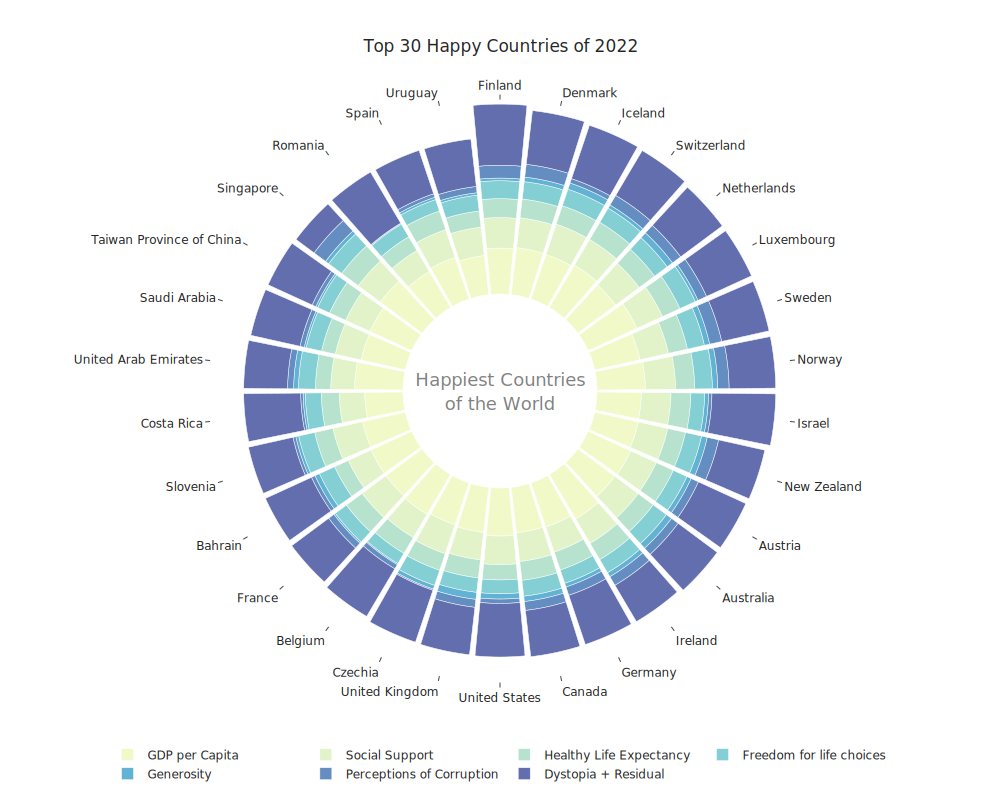

In [32]:
create_barplot_top(df_2022,30, 2022)

### Further Analysis
#### Happiness Score vs 7 key Factors
* GDP per Capita
* Social Support
* Healthy Life Expectancy
* Freedom for life choices
* Generosity
* Perceptions of Corruption
* Dystopia + Residual

In [33]:
def scatter_subplots(data, col_x, col_y, colorscale):
    
    X = data[col_x].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, data[col_y])

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))


    trace1 = go.Scatter(
        x = data[col_x],
        y = data[col_y],
        mode = 'markers',
        marker=dict(size=10, opacity=0.7, color=data[col_y], colorscale=colorscale),
        name = col_x
    )

    trace2 = go.Scatter(x=x_range, y=y_range, name='Regression Fit')
    
    return trace1, trace2

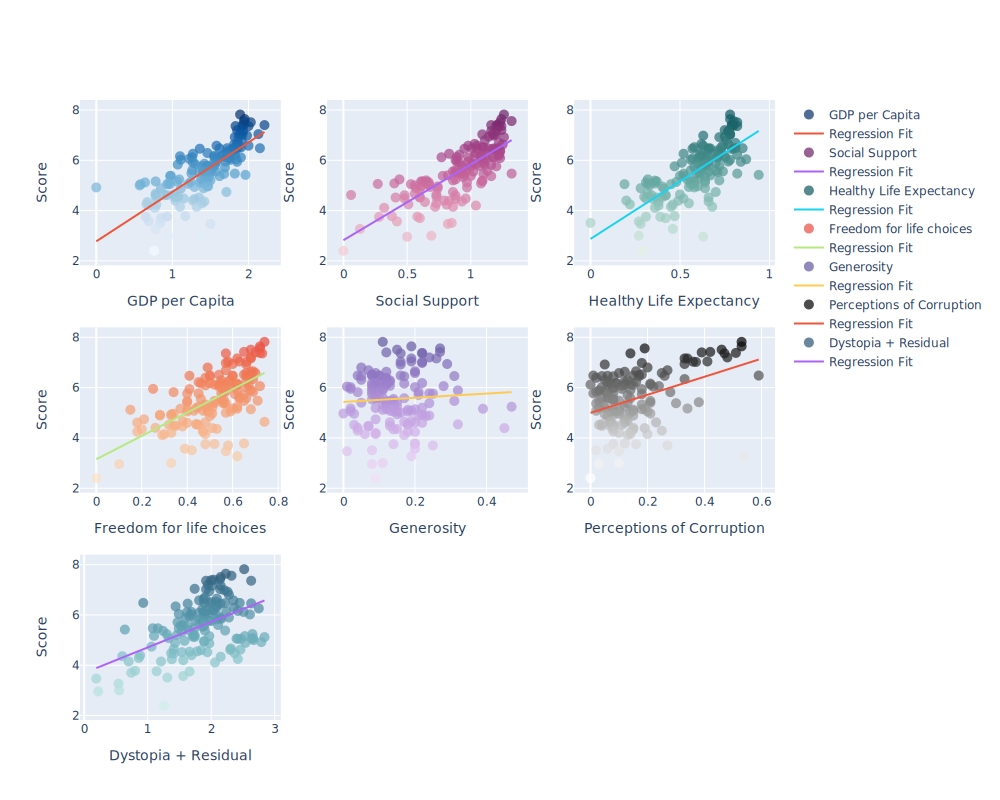

In [35]:
color_list = ['blues', 'magenta', 'mint', 'peach', 'purp', 'greys', 'teal']
col_list = df_2022.columns[4:]

fig = make_subplots(
    rows=3, cols=3)

row = list(range(1,4))
col = list(range(1,4))
row_col_list = [(x,y) for x in row for y in col]

for column,color,row_col_list in zip(col_list, color_list, row_col_list):
    sub = scatter_subplots(df_2022, column, 'Score', color)

    fig.add_trace(sub[0], row=row_col_list[0],col=row_col_list[1])
    fig.add_trace(sub[1], row=row_col_list[0],col=row_col_list[1])
    fig.update_xaxes(title_text=column, row=row_col_list[0], col=row_col_list[1])
    fig.update_yaxes(title_text='Score', row=row_col_list[0], col=row_col_list[1])

fig.update_layout(width=1000, height=800)

## For local notebook
#fig.show()
    
## to diplay in github
fig.show("svg")

#### From above plots we see
* GDP per Capita, Social Support, Healthy Life Expectancy, Freedom for life choices, Dystopia + Residual have strong correlations with Happiness Score  

* Generosity, Perceptions of Corruption does not have strong correlations with Happiness Score
       

### Year by Year Comparison


In [36]:

rdpu = ['#fee6e3', '#fdd4d0', '#fcbfbe', '#faa2b6', '#f87ca8', '#ee559d', '#d93095', '#b60982', '#91017a', '#6c0173']
pubu = ['#f1ebf5', '#e0dded', '#c9cee4', '#a9bfdc', '#86b0d3', '#5ea0ca', '#328dbf', '#0d75b3', '#04649d', '#03517e']
bugn = ['#eaf7fa', '#daf1f1', '#c4e9e1', '#9ddacb', '#78cab1', '#59bb93', '#3fab72', '#28914d', '#107a37', '#006227']
gnyl = ['#005e33', '#10743c', '#288a47', '#3fa85b', '#64bc6f', '#8bce81', '#b1df90', '#d2eda0', '#eaf7af', '#f9fdc5']
yor = ['#fff2ac', '#ffe48d', '#fed36f', '#feb54f', '#fd9a42', '#fd7636', '#fa4a29', '#e7231e', '#ce0c22', '#ac0026']
orange_1 = ['#feead6', '#fedcbb', '#fdca99', '#fdb170', '#fd994d', '#f9802d', '#ef6612', '#dd4d04', '#bd3e02', '#9b3203']

rdpu_r = rdpu[::-1]
pubu_r = pubu[::-1]
bugn_r = bugn[::-1]
gnyl_r = gnyl[::-1]
yor_r = yor[::-1]

orange_1_r = orange_1[::-1]


colors_list2=[rdpu, pubu, bugn, orange_1, yor]

sad_colors = [rdpu_r, pubu_r, bugn_r, orange_1_r, yor_r]

In [37]:
years=['2022','2021','2020','2019', '2018']
data_list = [df_2022, df_2021, df_2020, df_2019, df_2018]

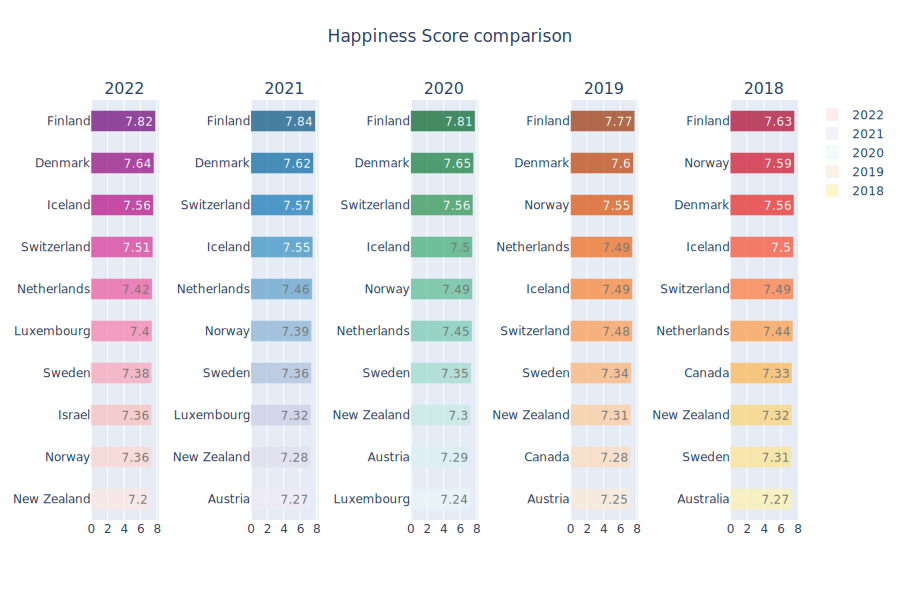

In [38]:


fig = make_subplots(
    rows=1, cols=5,horizontal_spacing=0.13, subplot_titles=years)


for index,(data,years, colors) in enumerate(zip(data_list,years, colors_list2)): 

    data_plot = data[:10].sort_values(by='Score', ascending=True)
    fig.add_trace(go.Bar(x=data_plot['Score'], y=data_plot['Country'], \
                         orientation='h', name=years,\
                         text=data_plot['Score'],marker=dict(color=colors), \
                         width=0.5, opacity=0.7), \
                  row=1,col=index+1)

fig.update_layout(width=900, height=600, title = dict(
            text='Happiness Score comparison', 
            yanchor = 'top', xanchor='center',
            x = 0.5, y=0.95
        ))

## For local notebook
#fig.show()
    
## to diplay in github
fig.show("svg")

It is clear from the above plots, 
* Finland is the clear winner as the Happiest country of the World
* Denmark holds the second place for the last four years
* Iceland, Switzerland are closely competing for the third place

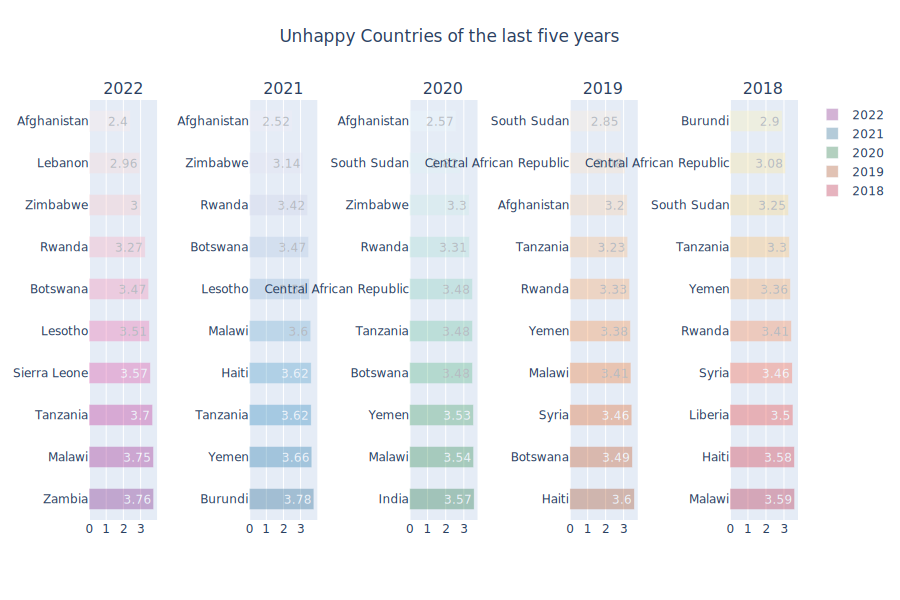

In [39]:
years=['2022','2021','2020','2019', '2018']
# data_list = [df_2022, df_2021, df_2020, df_2019, df_2018]
fig = make_subplots(
    rows=1, cols=5,horizontal_spacing=0.13, subplot_titles = years)


for index,(data,years, colors) in enumerate(zip(data_list,years, sad_colors)): 

    data_plot = data[-10:].sort_values(by='Score', ascending=False)
    fig.add_trace(go.Bar(x=data_plot['Score'], y=data_plot['Country'], \
                         orientation='h', name=years,\
                         text=data_plot['Score'],marker=dict(color=colors), \
                         width=0.5, opacity=0.3), \
                  row=1,col=index+1)

fig.update_layout(width=900, height=600, title = dict(
            text='Unhappy Countries of the last five years', 
            yanchor = 'top', xanchor='center',
            x = 0.5, y=0.95
        ))

## For local notebook
#fig.show()
    
## to diplay in github
fig.show("svg")

From the above plots we see, 
* Afghanistan most uphappy country in the last three years(2022,2021,2020)
* Followed by Lebanon, Zimbabwe, Rwanda in 2022
* South Sudan was in top three until 2020 then not in top for 2021 and 2022
* India(2020), Lebanon(2022), Zambia(2022) appeared only once

Now we will investigate further to see how the happiness score have changed over the years for few countires.

In [40]:
def line_country(country_name, color):
    years=['2022','2021','2020','2019', '2018']
    data_list = [df_2022, df_2021, df_2020, df_2019, df_2018]
    y_score=[]
    
    for year, data in zip(years,data_list):
        y=data[data['Country']==country_name]['Score']
        y_score.append(y.squeeze())
    
    scatter_country = pd.DataFrame({'Year':years, 'Score':y_score})
    scatter_country.sort_values(by='Year', ascending=True, inplace=True)
    
    trace = go.Scatter(x=scatter_country['Year'], y=scatter_country['Score'],mode='lines',\
                   line=dict(color=color,width=7), name=country_name,opacity=0.7)
    
    return trace

    

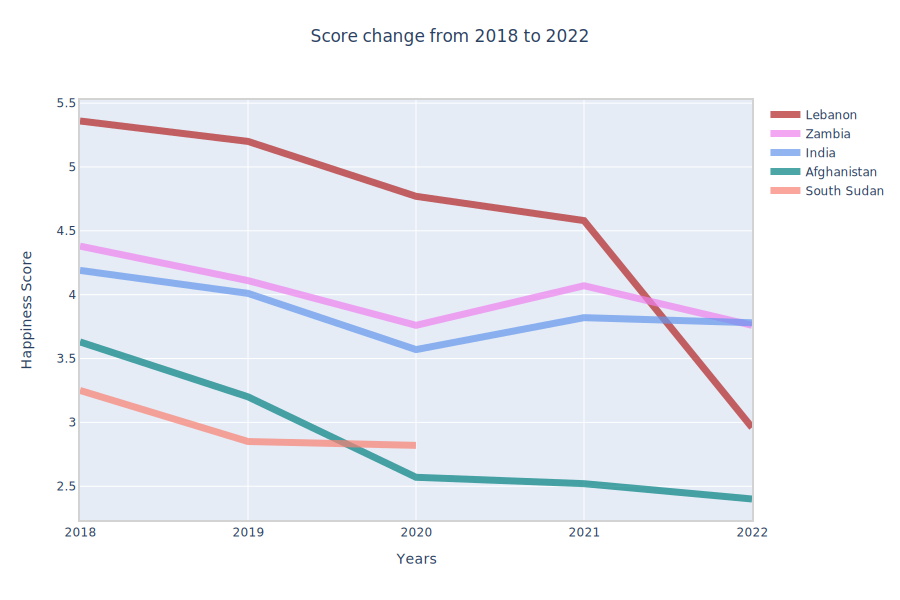

In [41]:
fig=go.Figure()
fig.add_trace(line_country('Lebanon', 'firebrick'))
fig.add_trace(line_country('Zambia','violet'))
fig.add_trace(line_country('India','cornflowerblue'))
fig.add_trace(line_country('Afghanistan', 'teal'))
fig.add_trace(line_country('South Sudan', 'salmon'))

fig.update_xaxes(title_text='Years',showline=True, linewidth=2, linecolor='lightgrey',mirror=True, range=[0,4])
fig.update_yaxes(title_text='Happiness Score',showline=True, linewidth=2, linecolor='lightgrey',mirror=True)
fig.update_layout(height=600, width=900, title=dict(text='Score change from 2018 to 2022',
                                                    yanchor = 'top', xanchor='center',
                                                    x = 0.5, y=0.95))
## For local notebook
#fig.show()
    
## to diplay in github
fig.show("svg")

we see,

* for Lebanon it is a sudden decrease in 2022
* for India and Zambia, it seems they are in a normal trend
* for Afghanistan, it is not a big surprise to be in the bottom
* for South Sudan not appearing in the bottom ten list in 2021 and 2022, because there is no data for South Sudan  

In [42]:
def region_bar(data, color):
    region_group = pd.DataFrame(data.groupby(by='Region')['Score'].mean())
    region_group.sort_values(by='Score',ascending=True, inplace=True)
    
    trace = go.Bar(x=region_group.index, y=region_group['Score'], \
                   marker=dict(color=color),width=0.9, opacity=0.6, \
                   text=region_group['Score'], \
                texttemplate='%{value:3.2f}', textfont=dict(color='white'))
    return trace

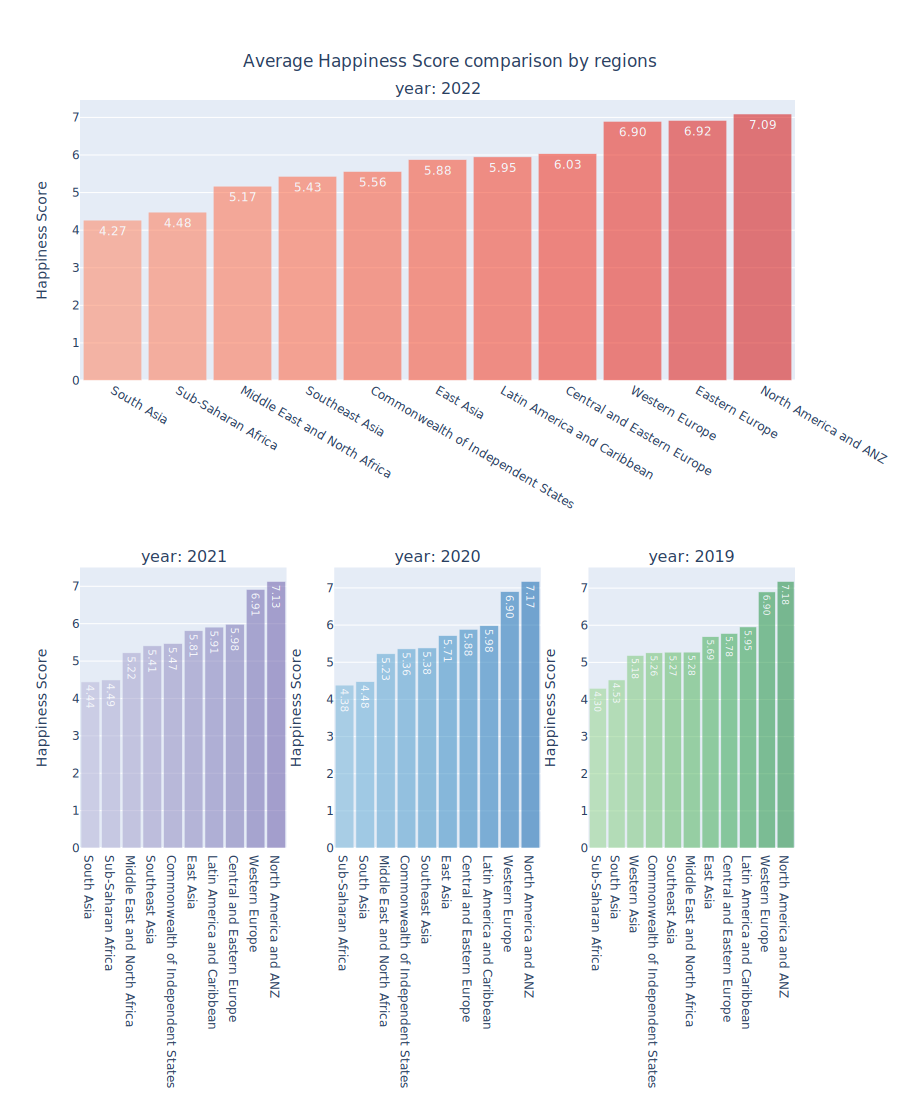

In [45]:
fig = make_subplots(rows=2, cols=3, 
                   specs=[
        [{'colspan':3}, None, None],
        [{}, {}, {}] 
    ], subplot_titles=['year: 2022', 'year: 2021', 'year: 2020', 'year: 2019'])

greens3 = ['#9cd797', '#91d28e', '#86cc85', '#7ac77b', '#6dc072', '#60ba6c', '#53b466', '#46ae60', '#3ca559', '#349d53', '#2d954d', '#258d47', '#1c8540', '#137d39', '#0a7633', '#016e2d', '#006328', '#005924', '#004e1f']
blues3 = ['#7fb9da', '#72b2d8', '#65aad4', '#5ba3d0', '#519ccc', '#4695c8', '#3c8cc3', '#3484bf', '#2c7cba', '#2373b6', '#1c6ab0', '#1562a9', '#0f5aa3', '#09529d']
reds3 =[ '#fc8e6e', '#fc8464', '#fb7a5a', '#fb7050', '#f96346', '#f6583e', '#f34c37', '#f0402f', '#e93529', '#e02c26', '#d72322', '#ce1a1e', '#c3161b', '#b91419', '#b01217']
purples3 = ['#b9b9da', '#b1b1d5', '#aaa8d0', '#a29fcb', '#9a96c6', '#928fc3', '#8b87bf', '#8380bb', '#7c75b6', '#776ab0', '#715faa', '#6c54a5', '#65489f', '#603e9a', '#5a3395']


fig.add_trace(region_bar(df_2022, reds3), row=1,col=1)
fig.add_trace(region_bar(df_2021, purples3), row=2,col=1)
fig.add_trace(region_bar(df_2020, blues3), row=2,col=2)
fig.add_trace(region_bar(df_2019, greens3), row=2,col=3)
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(height=1100, width=900, showlegend=False, 
                  title = dict(text='Average Happiness Score comparison by regions',
                                yanchor = 'top', xanchor='center',
                                x = 0.5, y=0.95))

## For local notebook
#fig.show()
    
## to diplay in github
fig.show("svg")


##### Now we see from the above plots,
* North America & Australia and New Zealand is the Happiest region of the world in all the four years
* South Asia and Sub-Saharan Africa has close contest for the last position 





In [46]:
def map_plot(data, data_code, colorscale):
    data_code.columns=['Country', 'GDP', 'Code']
    data = data.merge(data_code[['Country', 'Code']], how='left', on='Country')
    trace = go.Choropleth(
            locations = data['Code'],
                z = data['Score'],
                text = data['Country'],
                colorscale = colorscale,marker_line_color='darkgray',
                marker_line_width=0.5,
                colorbar_title = 'Happiness<br>Score')
    return trace
    

In [50]:


years=['2022','2021','2020','2019', '2018']
data_list = [df_2022, df_2021, df_2020, df_2019, df_2018]

colorscale_list = ['BuPu', 'GnBu', 'PuBu', 'RdPu', 'YlGn']




dW1 = widgets.Dropdown(options=years, description='Year:')
dW2 = widgets.Dropdown(options=colorscale_list, description='ColorScale:')


@widgets.interact(Y=dW1, C=dW2)


def plot_map(Y, C):
    new_data=pd.DataFrame()
    for year, data in zip(years, data_list):
        if Y==year:
            new_data = data.copy()
    
    fig = go.Figure()

    df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')


    fig.add_trace(map_plot(new_data, df_code, C))

    fig.update_layout(
        title=dict(text = f'Happiness Score around the world: {Y}',
        yanchor = 'top', xanchor='center',
                x = 0.5, y=0.95),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
    width = 800)

    ## For local notebook
    #fig.show()

    ## to diplay in github
    fig.show("svg")


interactive(children=(Dropdown(description='Year:', options=('2022', '2021', '2020', '2019', '2018'), value='2…

*added this to display in github what the final plot looks like*

<img src="map_plot2.png" />
